In [1]:
import torch
import cv2
from fixed_polygon_iou_loss import *
from matplotlib import pyplot as plt
import numpy as np

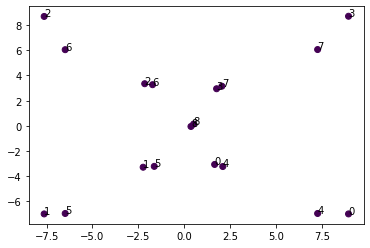

In [6]:
from matplotlib import pyplot as plt
import numpy as np
a = np.array([1.6607e+00, -3.0636e+00, -2.2373e+00, -3.2828e+00, -2.1526e+00,
          3.3471e+00,  1.7666e+00,  2.9478e+00,  2.1045e+00, -3.2290e+00,
         -1.6318e+00, -3.2162e+00, -1.7249e+00,  3.2689e+00,  2.0554e+00,
          3.1503e+00,  3.6911e-01, -4.7931e-02])
a = a.reshape((-1, 2))
plt.scatter(a[:, 0], a[:, 1], c=[0, 0, 0, 0, 0, 0, 0, 0, 0])
text = range(9)
for i in range(len(a[:, 0])):
    plt.annotate(text[i], (a[i, 0], a[i, 1]))

b = np.array([8.9604,  -6.9913,  -7.6346,  -6.9911,  -7.6346,   8.6886,   8.9604,
           8.7039,   7.2753,  -6.9564,  -6.4883,  -6.9562,  -6.4883,   6.0495,
           7.2753,   6.0601,   0.5122,   0.1401])
b = b.reshape((-1, 2))
plt.scatter(b[:, 0], b[:, 1], c=[1, 1, 1, 1, 1, 1, 1, 1, 1])
text = range(9)
for i in range(len(b[:, 0])):
    plt.annotate(text[i], (b[i, 0], b[i, 1]))
plt.show()

2009101.0
6255001.0
6598876.0
0.1852597969750597
1.27000093460083
torch.Size([2, 4, 2])
tensor([0.2389, 0.2389], dtype=torch.float64)
0.015629053115844727
115.2


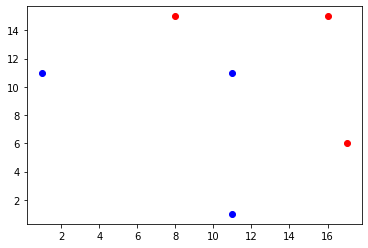

tensor([-0., -0.], dtype=torch.float64)


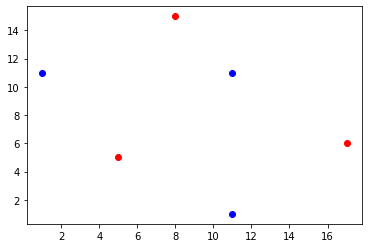

tensor([29.8154, 29.8154], dtype=torch.float64)


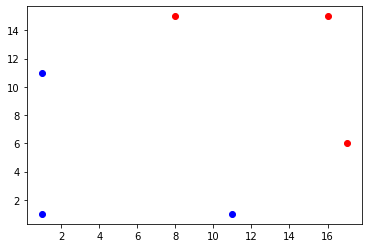

tensor([-0., -0.], dtype=torch.float64)


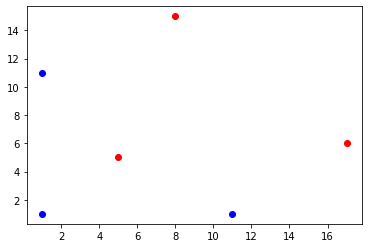

tensor([1.3846, 1.3846], dtype=torch.float64)
tensor([31.2000, 31.2000], dtype=torch.float64)
tensor([100., 100.])
tensor([94.5000, 94.5000])
tensor([0.1911, 0.1911], dtype=torch.float64)


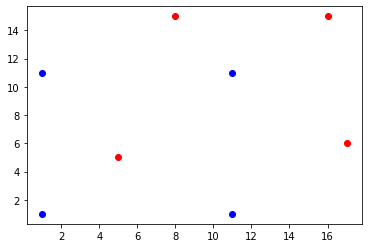

In [7]:
from fixed_polygon_iou_loss import batch_poly_diou_loss, batch_poly_iou, batch_unconvex_poly_iou
from matplotlib import pyplot as plt
import time
import numpy as np
import torch
import cv2

def raster_poly_IOU(poly1, poly2, scale=10000):
    poly1 = (poly1 * scale / 2.0 + scale / 4.0).astype(np.int32)
    poly2 = (poly2 * scale / 2.0 + scale / 4.0).astype(np.int32)

    im1 = np.zeros([scale, scale])
    im2 = np.zeros([scale, scale])
    imi = np.zeros([scale, scale])

    im1 = cv2.fillPoly(im1, [poly1], color=1)
    im2 = cv2.fillPoly(im2, [poly2], color=1)
    imi = (im1 + im2) / 2.0

    imi = np.floor(imi)

    ai = np.sum(imi)
    print(ai)
    a1 = np.sum(im1)
    print(a1)
    a2 = np.sum(im2)
    print(a2)

    iou = (ai) / (a1 + a2 - ai)

    return iou

poly1 = np.array([[11, 1], [11, 11], [1, 11], [1, 1]])
poly1 = poly1 / 20
poly2 = np.array([[17, 4], [16, 15], [8, 15], [5, 5]])
poly2 = poly2 / 20
start = time.time()
for i in range(1):
    iou = raster_poly_IOU(poly1, poly2)
print(iou)
print(time.time() - start)
polygon_single = torch.tensor([[11, 1], [11, 11], [1, 11], [1, 1]], dtype=torch.float)
# polygon = torch.tensor([[[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3]], [[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3]]], dtype=torch.float)
polygon = polygon_single.repeat(2, 1, 1)
print(polygon.shape)
polygon3_single = torch.tensor([[17, 6], [16, 15], [8, 15], [5, 5]], dtype=torch.float)
# polygon3 = torch.tensor([[[108.35, 53.53], [203.35, 234.31], [34.31, 24.3], [666.31, 126.3]], [[108.35, 53.53], [203.35, 234.31], [34.31, 24.3], [666.31, 126.3]]], dtype=torch.float)
polygon3 = polygon3_single.repeat(2, 1, 1)
start = time.time()
iou = batch_poly_iou(polygon.clone(), polygon3.clone())
print(iou)


print(time.time() - start)
print(1.728 / 0.015)
iou = batch_unconvex_poly_iou(polygon, polygon3)
print(iou)
plt.scatter(polygon[0, :, 0], polygon[0, :, 1], color='b')
plt.scatter(polygon3[0, :, 0], polygon3[0, :, 1], color='r')
plt.show()

In [2]:
polygon = torch.tensor([[[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3]], [[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3]]], dtype=torch.float)
polygon = batch_clockify(polygon)
polygon2 = torch.tensor([[[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3], [134.31, 11.3], [134.31, 11.3]], [[124.35, 46.53], [253.35, 21.31], [333.31, 214.3], [134.31, 11.3], [134.31, 11.3], [134.31, 11.3]]], dtype=torch.float)
polygon3 = torch.tensor([[[108.35, 53.53], [203.35, 234.31], [34.31, 24.3], [666.31, 126.3]], [[108.35, 53.53], [203.35, 234.31], [34.31, 24.3], [666.31, 126.3]]], dtype=torch.float)
polygon2 = batch_clockify(polygon2)
print(batch_poly_area(polygon))
print(batch_poly_area(polygon2))
print(batch_poly_diou_loss(polygon, polygon3))
print(c_poly_diou_loss(polygon[0], polygon3[0]))


tensor([15602.8906, 15602.8906])
tensor([15602.8906, 15602.8906])
tensor([[[   5815.7617,   17491.7402,  -20569.1035,   -2738.3989],
         [-113813.7578,   97983.1250,    3878.8857,   11951.7480],
         [  84716.7188, -100240.5625,   21837.6328,   -6313.7900],
         [  23281.2793,  -15234.3008,   -5147.4189,   -2899.5598]],

        [[   5815.7617,   17491.7402,  -20569.1035,   -2738.3989],
         [-113813.7578,   97983.1250,    3878.8857,   11951.7480],
         [  84716.7188, -100240.5625,   21837.6328,   -6313.7900],
         [  23281.2793,  -15234.3008,   -5147.4189,   -2899.5598]]])
tensor([0.8873, 0.8873], dtype=torch.float64)
tensor(0.8116)


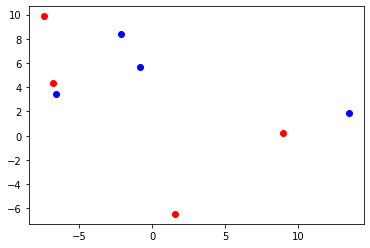

tensor([[[-203.8083,  145.6032,  168.1802, -109.9751],
         [ 114.5951, -152.4355,  -44.5683,   82.4088],
         [   8.0357,   28.4270,  -30.8374,   -5.6252],
         [  81.1776,  -21.5946,  -92.7745,   33.1915]],

        [[-938.0588, 1232.6897,  -33.1707, -261.4601],
         [ 131.7974, -301.8521,   73.7881,   96.2666],
         [ 397.8858, -784.5773,  154.6906,  232.0008],
         [ 408.3756, -146.2603, -195.3081,  -66.8073]]])
tensor([1.0045, 1.2491], dtype=torch.float64)
tensor(0.8920)


In [3]:
polygon1 = torch.normal(0, 10, (2, 4, 2))
polygon2 = torch.normal(0, 10, (2, 4, 2))
plt.scatter(polygon1[0, :, 0], polygon1[0, :, 1], color='b')
plt.scatter(polygon2[0, :, 0], polygon2[0, :, 1], color='r')
plt.show()
print(batch_poly_diou_loss(polygon1, polygon2))
print(c_poly_diou_loss(polygon1[0], polygon2[0]))


In [4]:
import torch
import cv2
from fixed_polygon_iou_loss import *
from matplotlib import pyplot as plt
import numpy as np

polygon1 = torch.tensor([[[ 17.0700, -10.5750],
         [ 17.0700,  10.5750],
         [-17.0700,  10.5750],
         [-17.0700, -10.5750]],

        [[ 56.5600, -28.7300],
         [ 56.5600,  28.7300],
         [-56.5600,  28.7300],
         [-56.5600, -28.7300]]], dtype=torch.float)
polygon2 = torch.tensor([[[ 16.3787, -12.3186],
         [ 16.3787,   8.2825],
         [ -2.5804,   8.2674],
         [  4.4665, -11.5463]],

        [[ 58.6684, -25.5243],
         [ 58.6684,  17.9563],
         [ 11.8985,  17.8795],
         [ -3.3420, -22.3114]]], dtype=torch.float)
# plt.scatter(polygon1[0, :, 0], polygon1[0, :, 1], color='b')
# plt.scatter(polygon2[0, :, 0], polygon2[0, :, 1], color='r')
# plt.show()
batch_poly_diou_loss(polygon1, polygon2)
c_poly_diou_loss(polygon1[0], polygon2[0])

tensor([[[-2.6366e+01,  7.0332e+02, -5.1553e-01, -6.7644e+02],
         [-2.5194e+02,  0.0000e+00,  4.0098e+02, -1.4904e+02],
         [ 2.6366e+01, -7.0332e+02,  5.1553e-01,  6.7644e+02],
         [ 2.5194e+02,  0.0000e+00, -4.0098e+02,  1.4904e+02]],

        [[-3.6344e+02,  4.9185e+03, -8.6878e+00, -4.5464e+03],
         [-3.5631e+03,  0.0000e+00,  2.6874e+03,  8.7572e+02],
         [ 3.6344e+02, -4.9185e+03,  8.6878e+00,  4.5464e+03],
         [ 3.5631e+03,  0.0000e+00, -2.6874e+03, -8.7572e+02]]])


tensor(nan)

In [7]:
import torch
import cv2
from fixed_polygon_iou_loss import *
from matplotlib import pyplot as plt
import numpy as np
polygon1 = torch.tensor([[[ 67.6174, -52.8318],
        [ -2.1224, -53.5810],
        [ -0.6367,  18.9606],
        [-73.3480,  20.2386]],

        [[ 67.6174, -52.8318],
        [ -2.1224, -53.5810],
        [ -0.6367,  18.9606],
        [-73.3480,  20.2386]]], dtype=torch.float)
polygon2 = torch.tensor([[[ 69.7797, -41.4189],
        [ -3.6572,  16.8086],
        [-68.8631,  16.8023],
        [ -3.6572, -49.2453]],

        [[ 69.7797, -41.4189],
        [ -3.6572,  16.8086],
        [-68.8631,  16.8023],
        [ -3.6572, -49.2453]]], dtype=torch.float)
print(batch_poly_diou_loss(polygon1, polygon2, 0))
c_poly_diou_loss(polygon1[0], polygon2[0])

tensor([0.2111, 0.2111], dtype=torch.float64)


tensor(0.2113)